In [1]:
# Importing required libraries.
import pandas as pd
import numpy as np
import seaborn as sns             #visualisation
import matplotlib.pyplot as plt   #visualisation
import os

%matplotlib inline 
sns.set(color_codes=True)

from dotenv import load_dotenv
from core_ds4a_project import cleaning, columns as project_columns, datasets

%load_ext autoreload
%autoreload 1
%aimport core_ds4a_project, core_ds4a_project.cleaning, core_ds4a_project.columns, core_ds4a_project.datasets

pd.set_option("display.max_columns", None)

Environment variables:

In [2]:
load_dotenv('envvars')

ROOT_DATA_PATH = os.environ.get('ROOT_DATA_PATH')
RAW_DATA_PATH = os.environ.get('RAW_DATA_PATH') or f'{ROOT_DATA_PATH}/raw'

Reading data:

In [3]:
(cartera_df, clientes_df, colocacion_df) = datasets.read_joining_datasets(dir_path=RAW_DATA_PATH)

<H2>EDA Colocación</H2>

In [4]:
colocacion_df.shape

(38641, 26)

In [5]:
colocacion_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38641 entries, 0 to 38640
Data columns (total 26 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   TASA_ANUAL          38641 non-null  float64       
 1   MONTO               38641 non-null  int64         
 2   VALOR_REFINANCIADO  38641 non-null  int64         
 3   VALOR_DESEMBOLSADO  38641 non-null  int64         
 4   OBLIGACION          38641 non-null  int64         
 5   FECHA_SOLICITUD     38641 non-null  datetime64[ns]
 6   FECHA_APROBA        38641 non-null  datetime64[ns]
 7   FECHA_DESEMBOLSO    38641 non-null  datetime64[ns]
 8   COD_LINEA           38641 non-null  object        
 9   LINEA               38641 non-null  object        
 10  COD_DESTINACION     38641 non-null  object        
 11  DESTINACION         38641 non-null  object        
 12  OBSERVACIONES       37997 non-null  object        
 13  VALOR_CUOTA         38641 non-null  object    

In [6]:
# Finding the null values.
print(colocacion_df.isnull().sum())

TASA_ANUAL                0
MONTO                     0
VALOR_REFINANCIADO        0
VALOR_DESEMBOLSADO        0
OBLIGACION                0
FECHA_SOLICITUD           0
FECHA_APROBA              0
FECHA_DESEMBOLSO          0
COD_LINEA                 0
LINEA                     0
COD_DESTINACION           0
DESTINACION               0
OBSERVACIONES           644
VALOR_CUOTA               0
NRO_CUOTAS                0
FECHA_PAGO                0
PERIODICIDAD_PAGO         0
COD_MODALIDAD             0
MODALIDAD                 0
ANO_CONTABILIZA           0
CODEUDOR                  0
DIAS_CICLO_CREDITO        0
CREDITOS_VIGENTES     19887
TIPO_CREDITO              0
CLIENTE                   0
DEFAULT               37678
dtype: int64


In [7]:
# Identify primary key
len(colocacion_df['OBLIGACION'].unique())

38641

In [8]:
colocacion_df.head()

,TASA_ANUAL,MONTO,VALOR_REFINANCIADO,VALOR_DESEMBOLSADO,OBLIGACION,FECHA_SOLICITUD,FECHA_APROBA,FECHA_DESEMBOLSO,COD_LINEA,LINEA,COD_DESTINACION,DESTINACION,OBSERVACIONES,VALOR_CUOTA,NRO_CUOTAS,FECHA_PAGO,PERIODICIDAD_PAGO,COD_MODALIDAD,MODALIDAD,ANO_CONTABILIZA,CODEUDOR,DIAS_CICLO_CREDITO,CREDITOS_VIGENTES,TIPO_CREDITO,CLIENTE,DEFAULT
0,38.40,1000000,0,985933,219000654,2021-08-30,2021-08-31,2021-08-31,CRE,CRECER,CT,CAPITAL DE TRABAJO,CLIENTE NUEVO( AUNQUE YA MANEJO CREDITOS CON N...,107742,12,2021-10-02,Mensual,410,DESARROLLO EMPRESARIAL CRECER (COMISION PYME) ...,2021,SIN_CODEUDOR,1,NaN,RENOVADO,FA21525,NaN
1,33.60,12000000,0,11966798,197002188,2021-08-26,2021-08-31,2021-08-31,GER,GERMINA,AF,ACTIVOS FIJOS,"CLIENTE ANTIGUO, CREDITO PARALELO, ACTIVIDAD G...",1704850,12,2021-12-02,Trimestral,394,EMP225 60 CREDITO RURAL INDIVIDUAL - GERMINA FNG,2021,SIN_CODEUDOR,5,1.0,PARALELO,FA12610,NaN
2,38.40,2000000,0,1906866,218000181,2021-08-29,2021-08-31,2021-08-31,CRE,CRECER,CT,CAPITAL DE TRABAJO,CLIENTE CON ACTIVIDAD DE DISTRIBUIDORA DE CERV...,215484,12,2021-10-02,Mensual,392,EMP219 70 DESARROLLO EMPRESARIAL CRECER FNG,2021,SIN_CODEUDOR,2,1.0,RENOVADO,FA14051,NaN
3,31.68,4000000,0,3977712,218000180,2021-08-30,2021-08-31,2021-08-31,GER,GERMINA,MX,MIXTO,CLIENTE CON ACTIIDAD DE CULTIVO DE YUCA 1 Y 1/...,266119,20,2021-10-03,Mensual,403,CREDITO RURAL INDIVIDUAL GERMINA,2021,SIN_CODEUDOR,1,1.0,RENOVADO,FA19592,NaN
4,35.28,1000000,0,997225,2112000110,2021-08-30,2021-08-31,2021-08-31,FID,FIDELIZACION,EME,EMERGENCIA,CLIENTE CON ACTIVIDAD DE VENTA DE ROPA INTERIO...,1002850,1,2021-12-03,Trimestral,398,CREDI-DESVARE EMERGENCIA TRIMESTRAL,2021,SIN_CODEUDOR,1,1.0,PARALELO,FA12947,NaN


In [9]:
colocacion_df["MONTO"].describe()

count    3.864100e+04
mean     3.774678e+06
std      3.969986e+06
min      3.000000e+05
25%      1.500000e+06
50%      2.950000e+06
75%      4.500000e+06
max      8.000000e+07
Name: MONTO, dtype: float64

Transform the "Loan amount" to facilitate visualizations:

In [10]:
colocacion_df["MONTO_MIL"] = colocacion_df["MONTO"] / 1000000 

In [11]:
colocacion_df["MONTO_MIL"].describe()

count    38641.000000
mean         3.774678
std          3.969986
min          0.300000
25%          1.500000
50%          2.950000
75%          4.500000
max         80.000000
Name: MONTO_MIL, dtype: float64

In [12]:
# Outliers (atypical values) OK
coloc = colocacion_df.groupby("MONTO")['OBLIGACION'].count()
coloc.sort_index(ascending=False).head(50)

MONTO
80000000      1
55000000      1
50000000     11
47000000      1
46500000      2
46000000      3
45000000      3
44000000      5
43000000      1
42000000      1
41000000      1
40000000     24
39000000      6
38000000      1
37000000      1
36885800      1
36800000      1
36000000      6
35000000     10
34000000      3
32800000      1
32000000      3
31000000      2
30000000     74
28000000      8
27000000      2
26000000      1
25000000     53
24000000      3
23000000      2
22500000      1
22400000      1
22200000      1
22000000     16
21945000      1
21900000      4
21200000      1
21000000     22
20700000      3
20600000      1
20508000      1
20400000      1
20000000    239
19800000      1
19530000      1
19500000     34
19000000     21
18600000      1
18500000      4
18442925      3
Name: OBLIGACION, dtype: int64

In [13]:
colocacion_df.groupby(['LINEA','DESTINACION'])["OBLIGACION"].count().reset_index(name="count")\
.sort_values(by='count', ascending=False).reset_index(drop=True).head(30)

,LINEA,DESTINACION,count
0,GERMINA,CAPITAL DE TRABAJO,9991
1,CRECER,CAPITAL DE TRABAJO,8935
2,CRECER,MIXTO,4949
3,MI CASA,MIXTO,2899
4,GERMINA,MIXTO,2823
5,CRECER,ACTIVOS FIJOS,2736
6,MI CASA,ACTIVOS FIJOS,2298
7,FIDELIZACION,EMERGENCIA,1509
8,GERMINA,ACTIVOS FIJOS,835
9,MI CASA,MATERIALES,468


Histogram "Loan amount" variable:

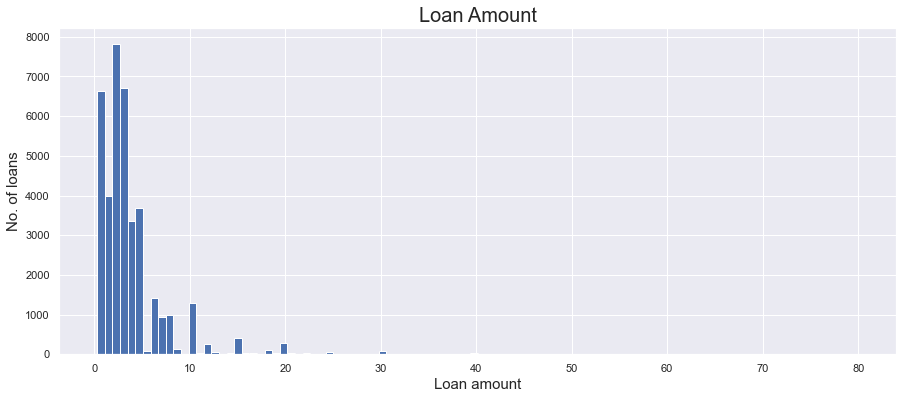

In [14]:
fig, ax = plt.subplots(figsize=(15,6))
colocacion_df["MONTO_MIL"].plot.hist(title="Loan Amount", bins=100)

# axis 'y' Label
plt.ylabel("No. of loans", fontsize = 15)
 
# axis 'x' label
plt.xlabel("Loan amount", fontsize = 15)

# Title
_ = plt.title("Loan Amount", fontsize = 20)

Boxplot Loan amount vs Loan installments:

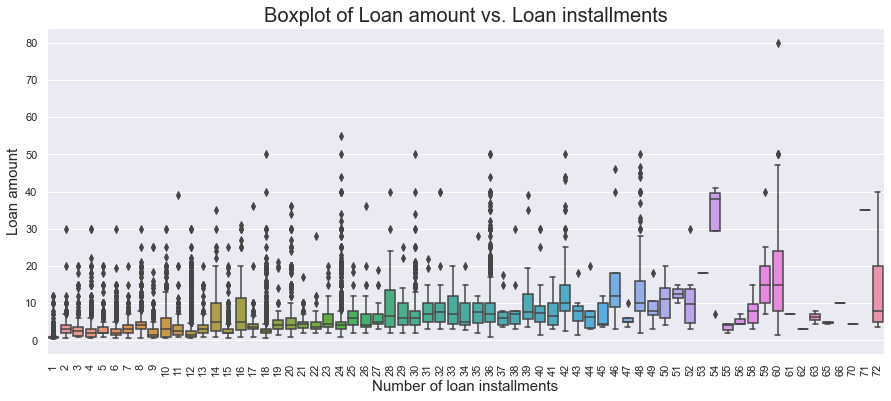

In [15]:
plt.subplots(figsize=(15,6))
sns.boxplot(x = "NRO_CUOTAS", y='MONTO_MIL', data = colocacion_df)
plt.title("Boxplot of Loan amount vs. Loan installments", fontsize = 20)
# axis 'y' Label
plt.ylabel("Loan amount", fontsize = 15)
# axis 'x' label
plt.xlabel("Number of loan installments", fontsize = 15)
_ = plt.xticks(rotation=90)

Average Loan amount as a time series:

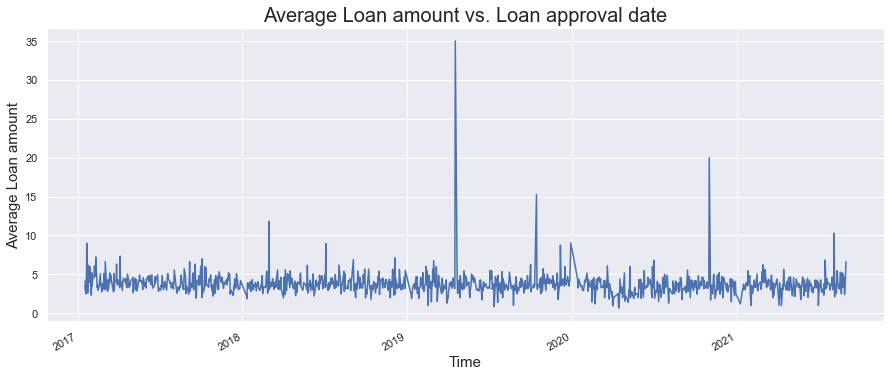

In [16]:
plt.subplots(figsize=(15,6))
colocacion_df.groupby("FECHA_APROBA")["MONTO_MIL"].mean().plot()
plt.title("Average Loan amount vs. Loan approval date", fontsize = 20)
# axis 'y' Label
plt.ylabel("Average Loan amount", fontsize = 15)
# axis 'x' label
_ = plt.xlabel("Time", fontsize = 15)

<H2> Loans over the time </H2>

Create function to identify monthly loans:

In [17]:
def fn_monthly_loans(df):
    """
    Group loans by month
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `monthly_loans`: The grouped Series
    """
    # Extract the year & month and create a new column    
    df["YY_MM"] = pd.Series(df["FECHA_APROBA"])
    df["YY_MM"] = df["YY_MM"].dt.to_period(freq = 'M') 
    
    # group by YY-MM
    monthly_loans = df.groupby(['YY_MM'])["OBLIGACION"].count()
    
    return monthly_loans

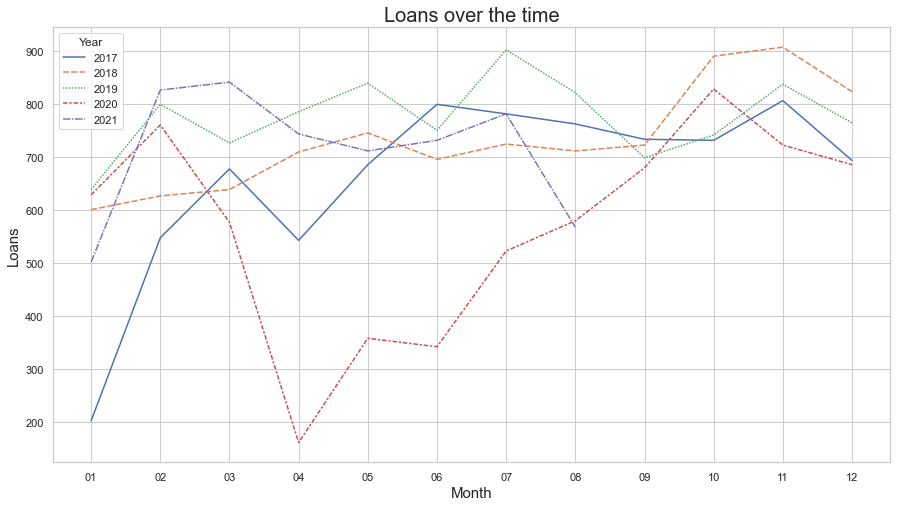

In [18]:
plt.gcf().set_size_inches(15, 8)
sns.set(style="whitegrid")  # can set style depending on how you'd like it to look

# Create DF with periods and loans
df_plt = pd.DataFrame(fn_monthly_loans(colocacion_df))

# Create a new columns with year and month separates with character '-' from field 'index'
df_plt["Year"]  = df_plt.index.astype(str)
df_plt["Month"] = df_plt.index.astype(str)
df_plt["Year"]  = df_plt["Year"].str.rpartition('-')[0]
df_plt["Month"] = df_plt["Month"].str.rpartition('-')[2]

# values 'x' & 'y' 
loans_plt_wide = df_plt.pivot("Month", "Year", "OBLIGACION")

# show graph
p = sns.lineplot(data=loans_plt_wide)

# Title
p.set_title("Loans over the time", fontsize = 20)

# axis 'x' label
p.set_xlabel("Month", fontsize = 15)

# axis 'y' Label
_ = p.set_ylabel("Loans", fontsize = 15)

<H2> Loans over the time by day of week </H2>

Create function to identify day of week loans:

In [19]:
def fn_weekday_loans(df):
    """
    Group loans by day of the week
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `weekday_loans`: The grouped Series
    """
   
    # Extract week day
    df["DAYOFWEEK"] = df["FECHA_APROBA"].dt.weekday
    
    # group by week day
    weekday_loans = df.groupby(['DAYOFWEEK'])["OBLIGACION"].count()
    
    return weekday_loans

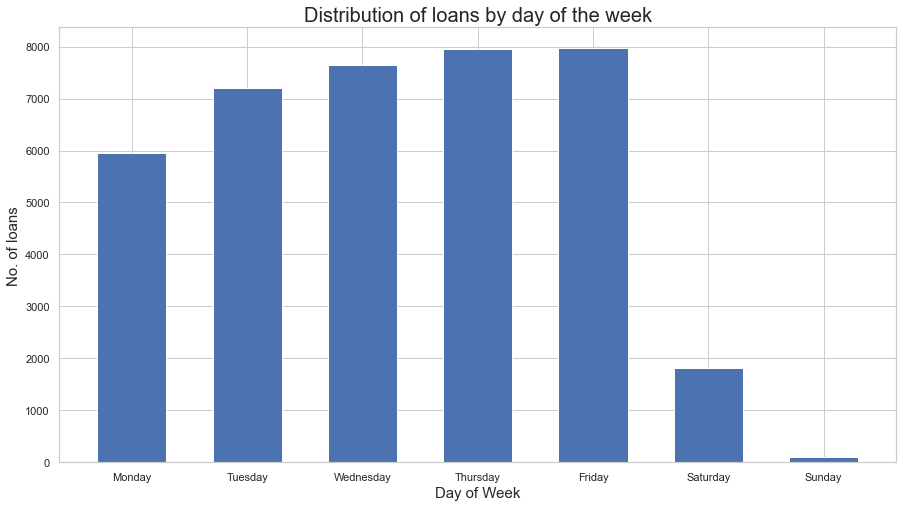

In [20]:
plt.gcf().set_size_inches(15, 8)

# axis 'x' values
eje_x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
 
# axis 'y' values
eje_y = fn_weekday_loans(colocacion_df)
 
# creating the bar plot
plt.bar(eje_x, eje_y,  width = 0.6)
 
# axis 'y' Label
plt.ylabel("No. of loans", fontsize = 15)
 
# axis 'x' label
plt.xlabel("Day of Week", fontsize = 15)

# Title
plt.title("Distribution of loans by day of the week", fontsize = 20)
 
# show graph
_ = plt.show()

Normalization

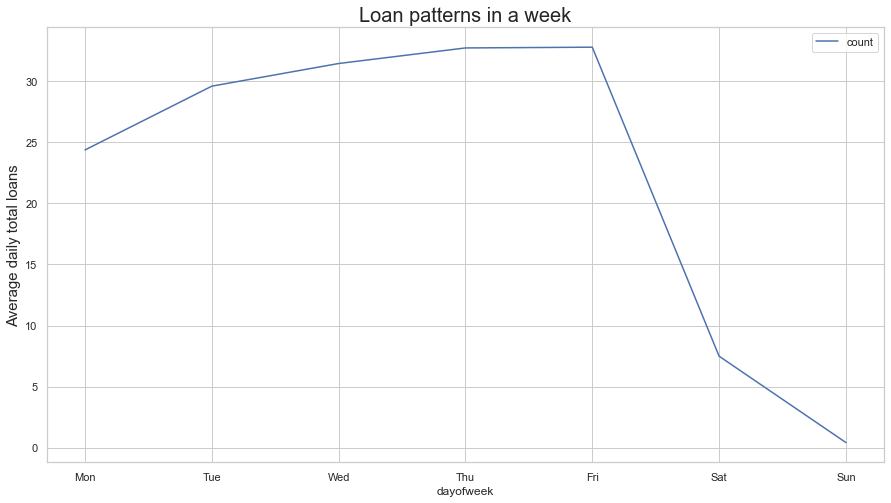

In [21]:
colocacion_df["dayofweek"] = colocacion_df.FECHA_APROBA.dt.dayofweek.astype("category")
colocacion_df.dayofweek = colocacion_df.dayofweek.cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res = colocacion_df.groupby(["dayofweek"])['OBLIGACION'].count().reset_index(name="count")
res['count'] = res['count']/pd.date_range("2017-1-1","2021-08-30", freq="D").dayofweek.value_counts()[::-1]
_ = res.plot(x="dayofweek", y = "count")
plt.gcf().set_size_inches(15, 8)
# Title
plt.title("Loan patterns in a week", fontsize = 20)
_ = plt.ylabel("Average daily total loans", fontsize = 15)

In [22]:
colocacion_df['ap_year'] = pd.DatetimeIndex(colocacion_df['FECHA_APROBA']).year  
colocacion_df['ap_month'] = pd.DatetimeIndex(colocacion_df['FECHA_APROBA']).month

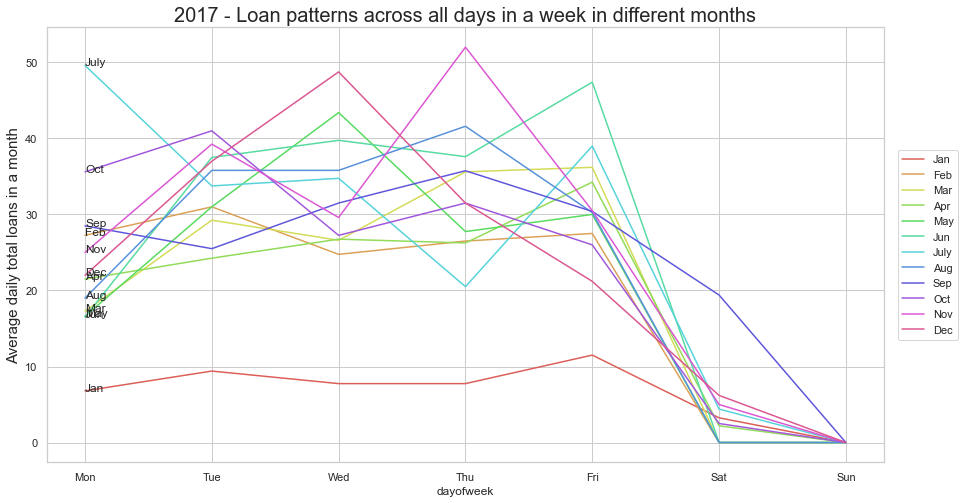

In [23]:
plt.gcf().set_size_inches(15, 8)

res_md = colocacion_df[(colocacion_df['ap_year'] == 2017)].groupby(['dayofweek','ap_month'])['OBLIGACION'].count().reset_index(name="count")

# normalization
date_2017 = pd.DataFrame( 
    {"dayofweek": pd.date_range("2017-1-1","2017-12-31",freq="D").dayofweek.astype("category"), 
     "ap_month": pd.date_range("2017-1-1","2017-12-31",freq="D").month } )

date_2017["dayofweek"] = date_2017["dayofweek"].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

nd_2017 = date_2017.groupby(['ap_month'])['dayofweek'].value_counts().sort_index().reset_index(name="day_count")
nd_2017 = nd_2017.rename(columns={'level_1':'dayofweek'})

res_md_norm = nd_2017.merge(res_md, how = "left", on = ["ap_month","dayofweek"])
res_md_norm['count_norm'] = res_md_norm['count']/res_md_norm['day_count']

res_md_norm['dayofweek'] = res_md_norm['dayofweek'].astype("category").cat.reorder_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res_md_norm['ap_month'] = res_md_norm['ap_month'].astype('category').cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])

mp = sns.lineplot(data=res_md_norm, x='dayofweek', hue = 'ap_month', y='count_norm', 
                  palette = sns.color_palette("hls",12))

mp = mp.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)

_ = plt.ylabel("Average daily total loans in a month", fontsize = 15)
_ = plt.title("2017 - Loan patterns across all days in a week in different months", fontsize = 20)

for i in range(12):
    tmp = res_md_norm[res_md_norm.dayofweek=="Mon"]
    _ = plt.text( 0, tmp['count_norm'].iloc[i], tmp['ap_month'].iloc[i])

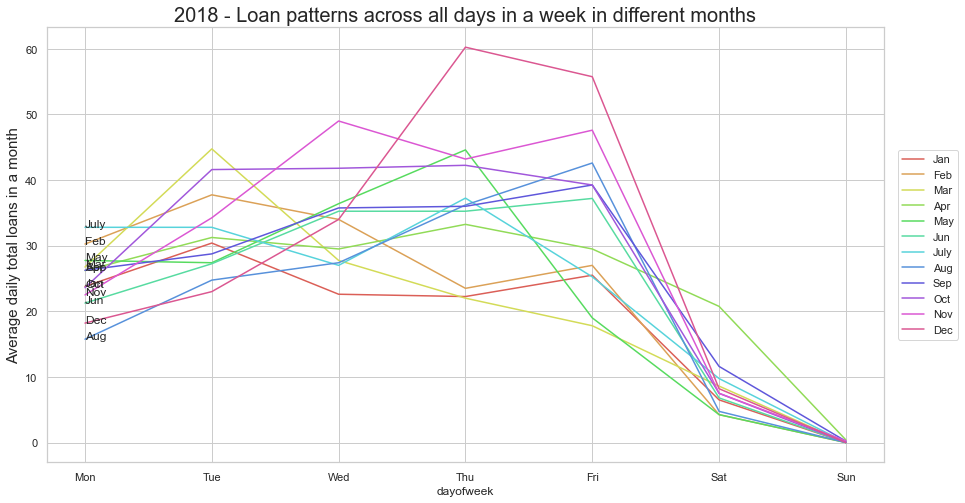

In [24]:
plt.gcf().set_size_inches(15, 8)

res_md = colocacion_df[(colocacion_df['ap_year'] == 2018)].groupby(['dayofweek','ap_month'])['OBLIGACION'].count().reset_index(name="count")

# normalization
date_2018 = pd.DataFrame( 
    {"dayofweek": pd.date_range("2018-1-1","2018-12-31",freq="D").dayofweek.astype("category"), 
     "ap_month": pd.date_range("2018-1-1","2018-12-31",freq="D").month } )

date_2018["dayofweek"] = date_2018["dayofweek"].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

nd_2018 = date_2018.groupby(['ap_month'])['dayofweek'].value_counts().sort_index().reset_index(name="day_count")
nd_2018 = nd_2018.rename(columns={'level_1':'dayofweek'})

res_md_norm = nd_2018.merge(res_md, how = "left", on = ["ap_month","dayofweek"])
res_md_norm['count_norm'] = res_md_norm['count']/res_md_norm['day_count']

res_md_norm['dayofweek'] = res_md_norm['dayofweek'].astype("category").cat.reorder_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res_md_norm['ap_month'] = res_md_norm['ap_month'].astype('category').cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])

mp = sns.lineplot(data=res_md_norm, x='dayofweek', hue = 'ap_month', y='count_norm', 
                  palette = sns.color_palette("hls",12))

mp = mp.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)

_ = plt.ylabel("Average daily total loans in a month", fontsize = 15)
_ = plt.title("2018 - Loan patterns across all days in a week in different months", fontsize = 20)

for i in range(12):
    tmp = res_md_norm[res_md_norm.dayofweek=="Mon"]
    _ = plt.text( 0, tmp['count_norm'].iloc[i], tmp['ap_month'].iloc[i])

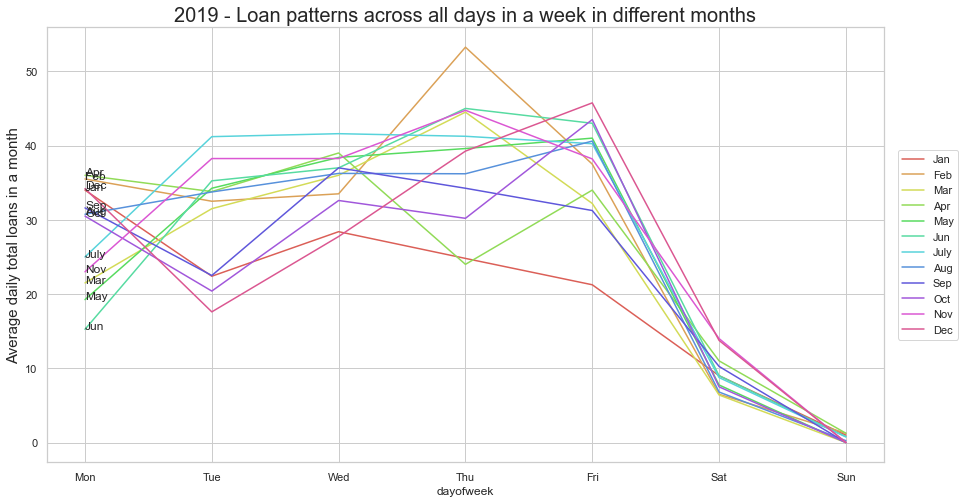

In [25]:
plt.gcf().set_size_inches(15, 8)

res_md = colocacion_df[(colocacion_df['ap_year'] == 2019)].groupby(['dayofweek','ap_month'])['OBLIGACION'].count().reset_index(name="count")

# normalization
date_2019 = pd.DataFrame( 
    {"dayofweek": pd.date_range("2019-1-1","2019-12-31",freq="D").dayofweek.astype("category"), 
     "ap_month": pd.date_range("2019-1-1","2019-12-31",freq="D").month } )

date_2019["dayofweek"] = date_2019["dayofweek"].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

nd_2019 = date_2019.groupby(['ap_month'])['dayofweek'].value_counts().sort_index().reset_index(name="day_count")
nd_2019 = nd_2019.rename(columns={'level_1':'dayofweek'})

res_md_norm = nd_2019.merge(res_md, how = "left", on = ["ap_month","dayofweek"])
res_md_norm['count_norm'] = res_md_norm['count']/res_md_norm['day_count']

res_md_norm['dayofweek'] = res_md_norm['dayofweek'].astype("category").cat.reorder_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res_md_norm['ap_month'] = res_md_norm['ap_month'].astype('category').cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])

mp = sns.lineplot(data=res_md_norm, x='dayofweek', hue = 'ap_month', y='count_norm', 
                  palette = sns.color_palette("hls",12))

mp = mp.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)

_ = plt.ylabel("Average daily total loans in a month", fontsize = 15)
_ = plt.title("2019 - Loan patterns across all days in a week in different months", fontsize = 20)

for i in range(12):
    tmp = res_md_norm[res_md_norm.dayofweek=="Mon"]
    _ = plt.text( 0, tmp['count_norm'].iloc[i], tmp['ap_month'].iloc[i])

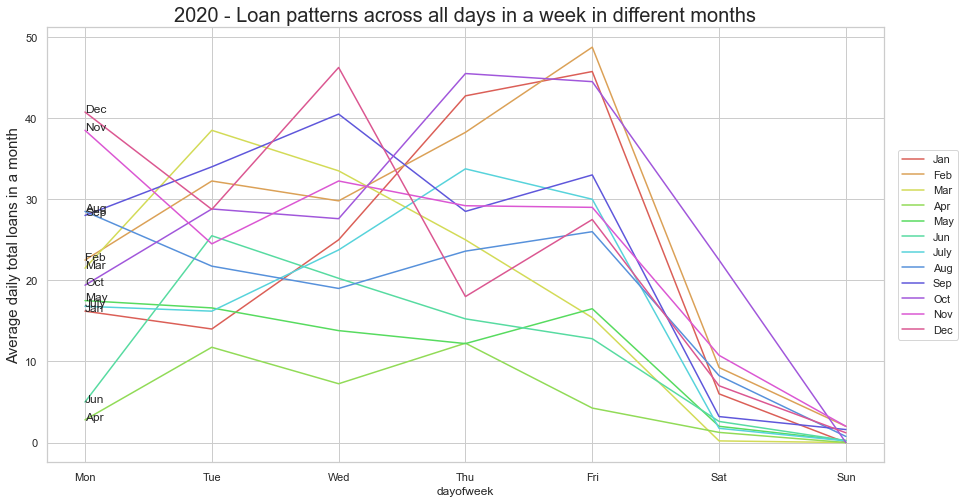

In [26]:
plt.gcf().set_size_inches(15, 8)

res_md = colocacion_df[(colocacion_df['ap_year'] == 2020)].groupby(['dayofweek','ap_month'])['OBLIGACION'].count().reset_index(name="count")

# normalization
date_2020 = pd.DataFrame( 
    {"dayofweek": pd.date_range("2020-1-1","2020-12-31",freq="D").dayofweek.astype("category"), 
     "ap_month": pd.date_range("2020-1-1","2020-12-31",freq="D").month } )

date_2020["dayofweek"] = date_2017["dayofweek"].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

nd_2020 = date_2020.groupby(['ap_month'])['dayofweek'].value_counts().sort_index().reset_index(name="day_count")
nd_2020 = nd_2020.rename(columns={'level_1':'dayofweek'})

res_md_norm = nd_2020.merge(res_md, how = "left", on = ["ap_month","dayofweek"])
res_md_norm['count_norm'] = res_md_norm['count']/res_md_norm['day_count']

res_md_norm['dayofweek'] = res_md_norm['dayofweek'].astype("category").cat.reorder_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res_md_norm['ap_month'] = res_md_norm['ap_month'].astype('category').cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","July","Aug","Sep","Oct","Nov","Dec"])

mp = sns.lineplot(data=res_md_norm, x='dayofweek', hue = 'ap_month', y='count_norm', 
                  palette = sns.color_palette("hls",12))

mp = mp.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)

_ = plt.ylabel("Average daily total loans in a month", fontsize = 15)
_ = plt.title("2020 - Loan patterns across all days in a week in different months", fontsize = 20)

for i in range(12):
    tmp = res_md_norm[res_md_norm.dayofweek=="Mon"]
    _ = plt.text( 0, tmp['count_norm'].iloc[i], tmp['ap_month'].iloc[i])

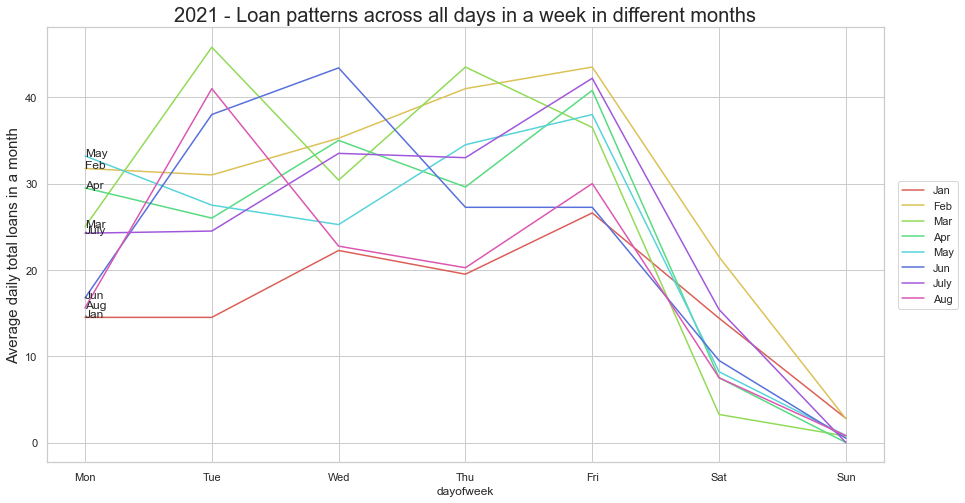

In [27]:
plt.gcf().set_size_inches(15, 8)

res_md = colocacion_df[(colocacion_df['ap_year'] == 2021)].groupby(['dayofweek','ap_month'])['OBLIGACION'].count().reset_index(name="count")

# normalization
date_2021 = pd.DataFrame( 
    {"dayofweek": pd.date_range("2021-1-1","2021-08-30",freq="D").dayofweek.astype("category"), 
     "ap_month": pd.date_range("2021-1-1","2021-08-30",freq="D").month } )

date_2021["dayofweek"] = date_2021["dayofweek"].cat.rename_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])

nd_2021 = date_2021.groupby(['ap_month'])['dayofweek'].value_counts().sort_index().reset_index(name="day_count")
nd_2021 = nd_2021.rename(columns={'level_1':'dayofweek'})

res_md_norm = nd_2021.merge(res_md, how = "left", on = ["ap_month","dayofweek"])
res_md_norm['count_norm'] = res_md_norm['count']/res_md_norm['day_count']

res_md_norm['dayofweek'] = res_md_norm['dayofweek'].astype("category").cat.reorder_categories(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"])
res_md_norm['ap_month'] = res_md_norm['ap_month'].astype('category').cat.rename_categories(["Jan","Feb","Mar","Apr","May","Jun","July","Aug"])

mp = sns.lineplot(data=res_md_norm, x='dayofweek', hue = 'ap_month', y='count_norm', 
                  palette = sns.color_palette("hls",8))

mp = mp.legend(loc='center left', bbox_to_anchor=(1.01, 0.5), ncol=1)

_ = plt.ylabel("Average daily total loans in a month", fontsize = 15)
_ = plt.title("2021 - Loan patterns across all days in a week in different months", fontsize = 20)

for i in range(8):
    tmp = res_md_norm[res_md_norm.dayofweek=="Mon"]
    _ = plt.text( 0, tmp['count_norm'].iloc[i], tmp['ap_month'].iloc[i])

<H2> Loans by Credit Line </H2>

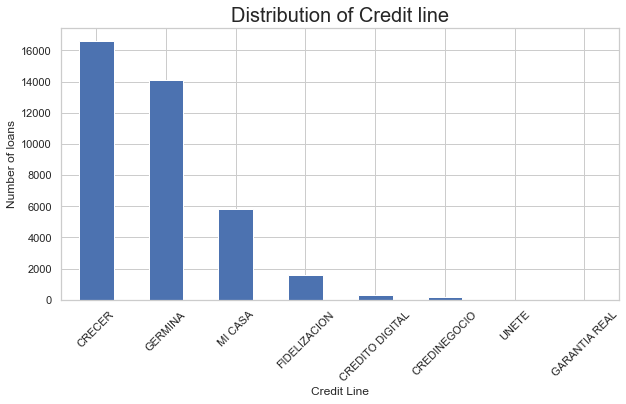

In [28]:
# Plotting a Histogram
colocacion_df.LINEA.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribution of Credit line", fontsize=20)
plt.ylabel("Number of loans")
plt.xticks(rotation=45)
plt.xlabel("Credit Line");

<H2> Loans by Purpose </H2>

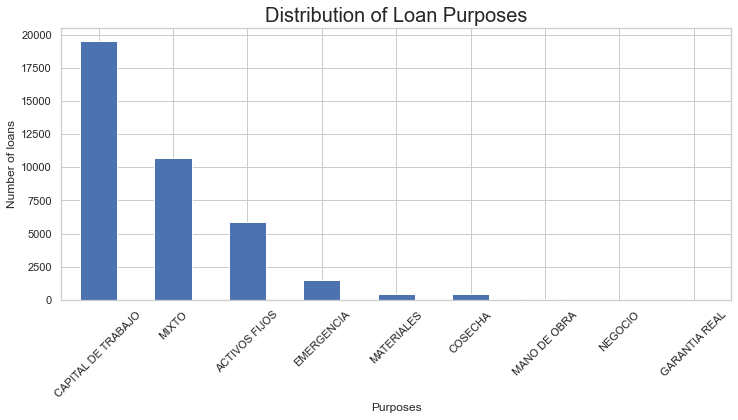

In [29]:
# Plotting a Histogram
colocacion_df.DESTINACION.value_counts().nlargest(40).plot(kind='bar', figsize=(12,5))
plt.title("Distribution of Loan Purposes", fontsize=20)
plt.xticks(rotation=45)
plt.ylabel("Number of loans")
plt.xlabel("Purposes");

<H2> Loans by payment frequency </H2>

In [30]:
def fn_payment_frequency(df):
    """
    Group loans by payment frequency
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `payment_frequency`: The grouped Series
    """

    # group by destination
    payment_frequency = df.groupby(['PERIODICIDAD_PAGO'])["OBLIGACION"].count()
    
    return payment_frequency

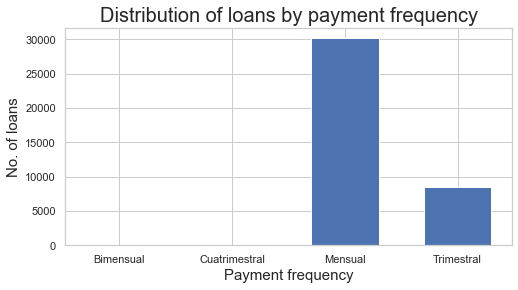

In [31]:
plt.gcf().set_size_inches(8, 4)

# Create series with loans by payment frequency
df_plt_region = fn_payment_frequency(colocacion_df)

# axis 'x' values
eje_x = list(df_plt_region.keys())
 
# axis 'y' values
eje_y = fn_payment_frequency(colocacion_df)
 
# creating the bar plot
plt.bar(eje_x, eje_y,  width = 0.6)
 
# axis 'y' Label
plt.ylabel("No. of loans", fontsize = 15)
 
# axis 'x' label
plt.xlabel("Payment frequency", fontsize = 15)

# Title
plt.title("Distribution of loans by payment frequency", fontsize = 20)

# show graph
_ = plt.show()

In [32]:
def fn_open_loans(df):
    """
    Group loans by status
    
    Arguments:
    `df`: A pandas DataFrame
    
    Outputs:
    `status`: The grouped Series
    """

    # group by status
    status = df.groupby(['CREDITOS_VIGENTES'])["OBLIGACION"].count()
    
    return status

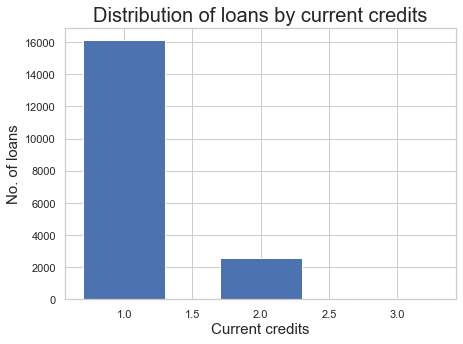

In [33]:
plt.gcf().set_size_inches(7, 5)

# Create series with loans by payment frequency
df_plt_region = fn_open_loans(colocacion_df)

# axis 'x' values
eje_x = list(df_plt_region.keys())
 
# axis 'y' values
eje_y = fn_open_loans(colocacion_df)
 
# creating the bar plot
plt.bar(eje_x, eje_y,  width = 0.6)
 
# axis 'y' Label
plt.ylabel("No. of loans", fontsize = 15)
 
# axis 'x' label
plt.xlabel("Current credits", fontsize = 15)

# Title
plt.title("Distribution of loans by current credits", fontsize = 20)

# show graph
_ = plt.show()

Que es crédito vigente 1, 2, 3 ?

In [34]:
colocacion_df["CREDITOS_VIGENTES"].unique()

array([nan,  1.,  2.,  3.])

In [35]:
colocacion_df['CREDITOS_VIGENTES'].isnull().sum()

19887